# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цель практической работы

Научиться работать с аномалиями в данных, строить визуализации, а также выявлять зависимости между переменными с помощью библиотеки Matplotlib.

## Что входит в практическую работу

1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графики для количественных переменных.
4. Построить графики для категориальных переменных.
5. Исследовать зависимости в данных. 

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [49]:
# Импортируйте необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [50]:
# Ваш код здесь
df = pd.read_csv("data/vehicles_dataset_upd.csv")
df.head()


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

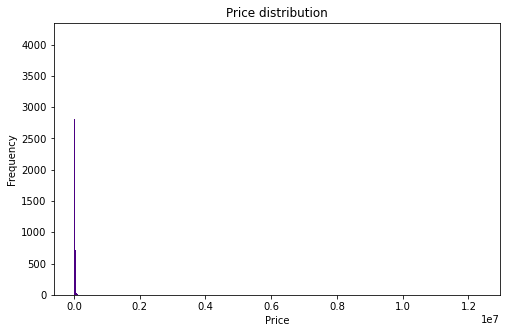

In [51]:
# Ваш код здесь
plt.figure(figsize=(8,5))
plt.hist(df.price,bins=1000,color="indigo")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price distribution");

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

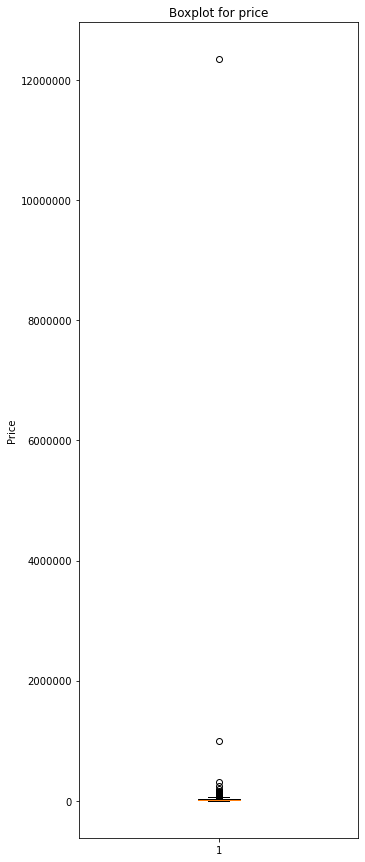

In [52]:
# Ваш код здесь
fig,ax = plt.subplots(figsize=(5,15))
ax.boxplot(df.price)
ax.set_ylabel("Price")
ax.set_title("Boxplot for price")
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))


4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [53]:
# Ваш код здесь
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [54]:
boundaries = (df.price.quantile(0.25), df.price.quantile(0.75))
print("25% = ", boundaries[0], ", 75% = ", boundaries[1])

25% =  7800.0 , 75% =  27990.0


6. Посчитайте и выведете количество выбросов в стоимости автомобиля. 

In [55]:
# Ваш код здесь
is_outlier = (df.price < boundaries[0]) | (df.price > boundaries[1])
print("Количество выбросов:", is_outlier.sum())



Количество выбросов: 4885


7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [56]:
# Ваш код здесь
list_of_id_outliers = is_outlier.loc[is_outlier == True].index
df_sorted_outliers = df.price.loc[list_of_id_outliers].sort_values()
df_sorted_outliers


5079         500
868          500
327          500
981          500
1471         500
          ...   
6035      197999
290       239995
5585      304995
9663     1000000
6239    12345678
Name: price, Length: 4885, dtype: int64

8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.


In [57]:
#%%time
#df_sorted_outliers.iloc[-15:]
#df_sorted_outliers.tail(15)
df.loc[df_sorted_outliers.tail(15).index]


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
4073,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021,chevrolet,corvette c8 z51,gas,10,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,35.081800,-106.648200,2021-04-24T08:38:45-0600,high,2021-04-24 14:38:45+00:00
9072,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006,jeep,wrangler,gas,12345,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,38.025845,-87.596457,2021-04-18T09:55:42-0500,high,2021-04-18 14:55:42+00:00
1674,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1995,other,cadvwrambuick,gas,283995,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,46.735200,-117.172900,2021-04-07T15:57:23-0700,high,2021-04-07 22:57:23+00:00
2963,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018,mercedes-benz,benz amg gt c,gas,4000,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,30.122300,-81.362700,2021-04-17T16:48:42-0400,high,2021-04-17 20:48:42+00:00
5076,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007,ferrari,f430 spider,gas,12351,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,42.756205,-71.210258,2021-04-29T14:45:08-0400,high,2021-04-29 18:45:08+00:00
6471,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018,mercedes-benz,maybach s560,gas,6000,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,28.463700,-81.394800,2021-04-25T12:58:01-0400,high,2021-04-25 16:58:01+00:00
8904,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017,other,Mclaren 570GT W/ Upgrades,gas,13000,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,32.790400,-96.804400,2021-04-30T08:20:20-0700,high,2021-04-30 15:20:20+00:00
4183,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015,mercedes-benz,sprinter 3500 airs,diesel,49291,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,45.382346,-122.605132,2021-05-03T11:04:09-0700,high,2021-05-03 18:04:09+00:00
8720,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006,other,Peterbilt 378,diesel,1234,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,30.364900,-97.682700,2021-04-27T21:01:28-0500,high,2021-04-28 02:01:28+00:00
9042,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020,mercedes-benz,other,other,6318,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,45.494265,-122.579192,2021-04-14T11:26:24-0500,high,2021-04-14 16:26:24+00:00


9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

*Подсказка*: обратите внимание на оператор "~" (тильда) при фильтрации исходного датафрейма. Это операция not, которая часто применяется для инвертирования логических значений. Советуем заглянуть в [документацию](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), чтобы получить представление о его работе на примерах использования.

In [58]:
# Ваш код здесь

df_new = df.drop(labels = list_of_id_outliers,axis = 0)
df_new.price.sort_values().head(5)


149     7800
5882    7800
6237    7800
8901    7800
4334    7800
Name: price, dtype: int64

### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [59]:
# Ваш код здесь
df_mean_price_of_year = df_new.groupby("year").agg({"price":"mean"})
df_mean_price_of_year = df_mean_price_of_year.rename(columns={"price":"price_mean"}).reset_index()
df_mean_price_of_year.head(10)

,year,price_mean
0,1995,14847.100478
1,1996,13079.000000
2,1997,13739.166667
3,1998,12239.000000
4,1999,13707.950000
5,2000,13371.333333
6,2001,14545.236842
7,2002,12184.968750
8,2003,13235.568627
9,2004,12080.919355


2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

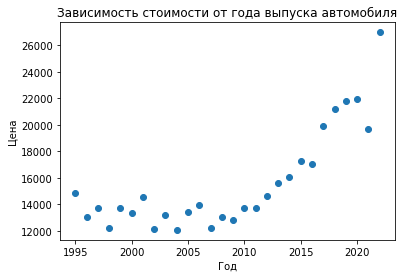

In [60]:
# Ваш код здесь
plt.figure()
plt.scatter(df_mean_price_of_year["year"],df_mean_price_of_year["price_mean"])
plt.title('Зависимость стоимости от года выпуска автомобиля')
plt.xlabel("Год")
plt.ylabel("Цена")
plt.show();


3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [61]:
# Ваш код здесь
#df_new.year.value_counts().sort_values(revert=False)
df_new.groupby("year").agg({"model":"count"}).sort_values("year",ascending=False)

,model
year,
2022,1
2021,12
2020,104
2019,189
2018,379
2017,432
2016,477
2015,415
2014,445


4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [62]:
# Ваш код здесь
df_new = df_new.loc[df_new["year"]<=2021]
df_new.shape
df_new.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,clean,other,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00
8,7315031640,https://grandrapids.craigslist.org/ctd/d/wyomi...,grand rapids,https://grandrapids.craigslist.org,14000,2014,dodge,charger,gas,94535,clean,automatic,https://images.craigslist.org/00R0R_duXwztf7DY...,2014 Dodge Charger 4dr Sdn SXT RWD Offered...,mi,42.914352,-85.730042,2021-04-30T17:20:30-0400,medium,2021-04-30 21:20:30+00:00


5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [63]:
# Ваш код здесь
df_mean_price_of_year_v2 = df_new.groupby("year").agg({"price":"mean"})
df_mean_price_of_year_v2 = df_mean_price_of_year_v2.rename(columns={"price":"price_mean"}).reset_index()
df_mean_price_of_year_v2

,year,price_mean
0,1995,14847.100478
1,1996,13079.000000
2,1997,13739.166667
3,1998,12239.000000
4,1999,13707.950000
5,2000,13371.333333
6,2001,14545.236842
7,2002,12184.968750
8,2003,13235.568627
9,2004,12080.919355


6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

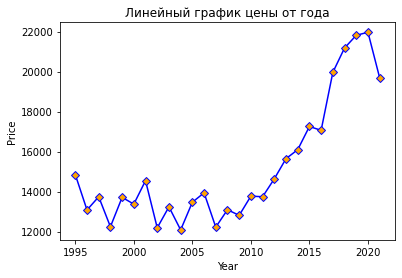

In [64]:
# Ваш код здесь
#plot(x, y, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.figure()
plt.plot(df_mean_price_of_year_v2["year"],df_mean_price_of_year_v2["price_mean"],color="blue",marker="D",
        markerfacecolor="orange")
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Линейный график цены от года");



7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ:да, линейная зависимость, потому что за увеличением года производства в целом следует увеличение цены. такая связь называется прямой.

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ:нет, корреляция слабая, считается средняя корреляция около 0.7 , выше 0.7 -сильная, мы видим 0.35.

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: прямая т.к. коэфициент кор. > 0, обратная - это когда коэф-т корреляции меньше 0.

In [65]:
# Ваш код здесь 
df_new["price"].corr(df_new["year"])

0.35376399999582425

8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

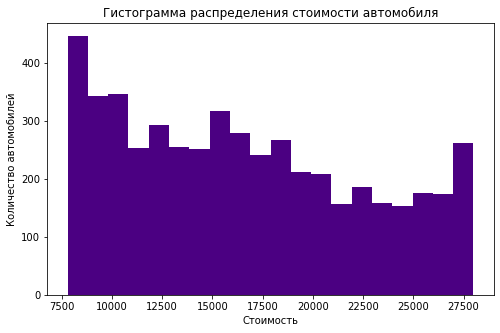

In [75]:
# Ваш код здесь
plt.figure(figsize=(8,5))
plt.hist(df_new["price"],bins=20,color="indigo")
plt.xlabel("Стоимость")
plt.ylabel("Количество автомобилей")
plt.title("Гистограмма распределения стоимости автомобиля");

9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [67]:
# Ваш код здесь
df_new.to_csv("data/vehicles_dataset_upd2.csv",index=False)

### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории. 

Подумайте, почему полученный график так выглядит?


In [68]:
# Ваш код здесь
df_upd2 = pd.read_csv("data/vehicles_dataset_upd2.csv")
uniq_categories = df_upd2.price_category.unique()
uniq_categories

array(['medium', 'high', 'low'], dtype=object)

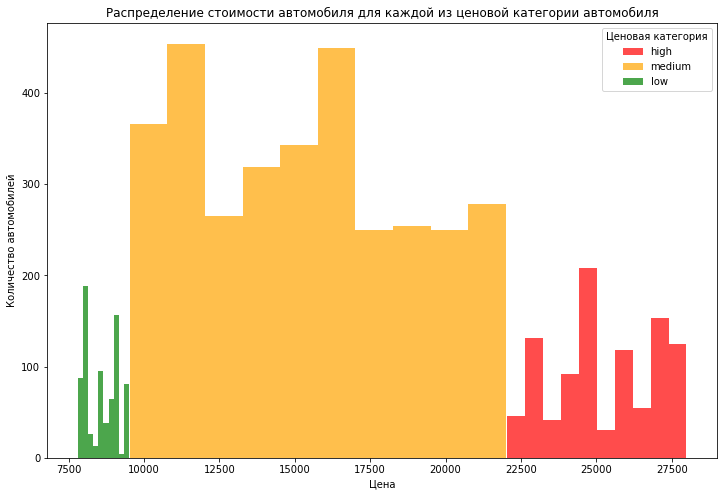

In [88]:
#%%time
#график так выглядит , потому что, цикл сгруппировал значения цены по категориям, и мы видим цену последовально... 

colors = {'high':"red", 'medium':"orange",  'low':"green"}
plt.figure(figsize=(12,8))

for price_category in colors:
    plt.hist(df_upd2.price.loc[df_upd2["price_category"]==price_category].values,\
            color=colors[price_category],alpha=0.7)

plt.xlabel("Цена")
plt.ylabel("Количество автомобилей")
plt.title("Pаспределениe стоимости автомобиля для каждой из ценовой категории автомобиля")
plt.legend(colors,title="Ценовая категория")
plt.show();

#так работает быстрее но ...(((( 
#colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
# fig, ax = plt.subplots(figsize=(12, 8))

# for price_category in colors:
#     color = colors[price_category]
#     data = df_upd2[df_upd2['price_category'] == price_category]

#     ax.hist(data ['price'], color=color, alpha  =  0.7)

# ax.legend(colors, loc='upper right', title="Ценовая категория")

# plt.ylabel('Количество')
# plt.xlabel('Цена')
# plt.title('Распределение стоимости автомобиля по ценовой категории')



2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу. 

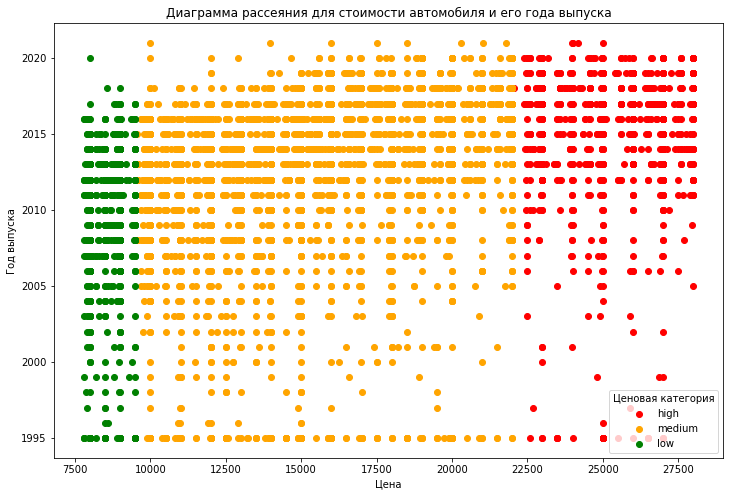

In [89]:
# Ваш код здесь
fig,ax = plt.subplots(figsize=(12,8))
for price_category in colors:
    
    color = colors[price_category]
    data = df_upd2[df_upd2["price_category"]==price_category]
    ax.scatter(data.price,data.year, c=color, label=price_category)
ax.legend(loc="lower right",title="Ценовая категория")
plt.title("Диаграмма рассеяния для стоимости автомобиля и его года выпуска")
plt.xlabel("Цена")
plt.ylabel("Год выпуска")
plt.show;


### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [105]:
# Ваш код здесь
df_manufacturer = df_upd2.groupby(["manufacturer"]).agg({"manufacturer":"count"})
df_manufacturer = df_manufacturer.rename(columns={"manufacturer":"counts"}).reset_index()
df_manufacturer.head()

,manufacturer,counts
0,acura,65
1,alfa-romeo,5
2,audi,87
3,bmw,175
4,buick,85


2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

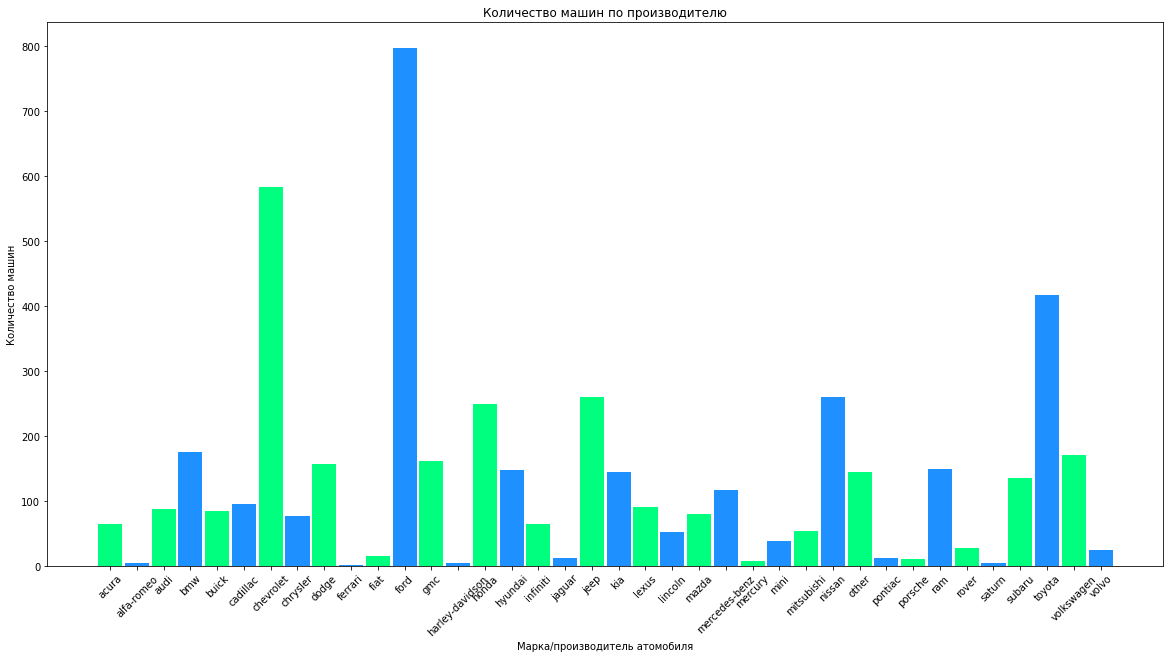

In [133]:
#df_manufacturer.plot(x="manufacturer", y="counts", kind="bar", rot=45, fontsize=4)
plt.subplots(figsize=(20,10))
plt.bar(df_manufacturer.manufacturer, df_manufacturer.counts, width=0.9, color = ["springgreen","dodgerblue"])
plt.xticks(rotation=45)
plt.title("Количество машин по производителю")
plt.ylabel("Количество машин")
plt.xlabel("Марка/производитель атомобиля");

3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [136]:
# Ваш код здесь
df_transmission = df_upd2.groupby("transmission").agg({"transmission":"count"})
df_transmission = df_transmission.rename(columns={"transmission":"counts"}).reset_index()
df_transmission

,transmission,counts
0,automatic,3910
1,manual,302
2,other,770


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


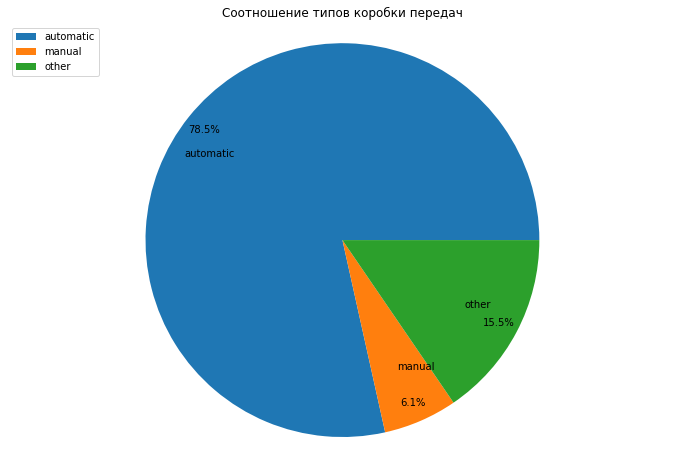

In [160]:
# Ваш код здесь
fig1, ax = plt.subplots(figsize=(12,8))
ax.pie(df_transmission.counts, labels=df_transmission.transmission, autopct='%1.1f%%', labeldistance=0.7,\
       pctdistance=0.9)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.title("Соотношение типов коробки передач")
plt.show();